In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

import numpy as np

In [2]:
def display_image (path:str):
    img = Image.open(path)  
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

In [3]:
import glob

# For current directory
txt_files = glob.glob("../raw_data/old/hhd/test/test_rand/image_text_pairs_test_rand.csv")

### Handwritten Dataset Split

In [4]:
hhd_df = pd.read_csv("../raw_data/old/hhd/train_raw/image_text_pairs_train.csv",header=None, names=["images","text"]) 

In [5]:
hhd_df.head(5)

,images,text
0,train_00000.png,ን፡አስቦ፡እኔምጂ፡እሞታለሁ፡፥
1,train_00001.png,እግዚእነ፡ኢየሱስ፡
2,train_00002.png,ኢይፈርህ፡እምአእላፍ፡አሕዛብ
3,train_00003.png,ው፡ነገር፡ያልሰሙ፡ከዕ
4,train_00004.png,ዕዋፈ፡አጸ


In [6]:
len(hhd_df)

57374

In [7]:
hdrand_root = "../raw_data/old/hhd/train_raw/image_train"

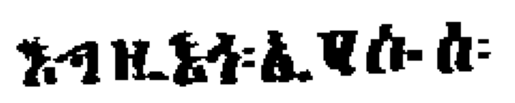

እግዚእነ፡ኢየሱስ፡                                    


In [8]:
display_image(os.path.join(hdrand_root , hhd_df.iloc[1]['images']))  
print(hhd_df.iloc[1]['text'])

In [9]:
texts = hhd_df['text'].tolist()

In [10]:
from collections import Counter
all_text = ''.join(texts)
char_counts = Counter(all_text)



In [11]:
len(hhd_df)

57374

In [12]:
sorted_counts = dict(sorted(char_counts.items(), key=lambda item: item[1], reverse=True))



In [13]:

texts = hhd_df['text'].dropna().astype(str)
char_df = pd.DataFrame(char_counts.items(), columns=["char", "count"])

# Compute 95th percentile threshold
threshold = np.percentile(char_df['count'], 55)

# Define rare characters: strictly below 95th percentile
rare_chars = set(char_df[char_df['count'] < threshold]['char'])

# Tag rows that contain rare characters
def contains_rare_char(text):
    return any(char in rare_chars for char in text)

hhd_df['has_rare'] = texts.apply(contains_rare_char)

# Calculate percentage
percentage = (hhd_df['has_rare'].sum() / len(hhd_df)) * 100
print(f"Percentage of entries with rare characters: {percentage:.2f}%")


Percentage of entries with rare characters: 22.79%


In [14]:

#seperate df with rare and non rare characters
hddrand_df_rare = hhd_df[hhd_df['has_rare'] == True]
hddrand_df_non_rare = hhd_df[hhd_df['has_rare'] == False]

In [65]:
len(hddrand_df_rare), len(hddrand_df_non_rare) 

(2405, 3970)

In [66]:
hhd_df['type'] = 'hdd_rand'

In [67]:
hddrand_df_rare.head(5)

,images,text,has_rare
0,test_rand_00000.png,ፅ፡ዳዊት፡፻፵፱፡ሰብሕዎ፡,True
1,test_rand_00001.png,ኦሰ፡ኤጲሰ፡ቆጶስ፡፲፬እስተ,True
2,test_rand_00002.png,የምንሰራው፡ብዙ፡በጎ፡ነገር,True
7,test_rand_00007.png,ዓኪኀበ፡ቁሰጠገጢ,True
9,test_rand_00009.png,ሜን።ወበአሐቲ፡,True


In [15]:
train_df = pd.DataFrame(columns=['image_filename', 'line_text', 'type'])

In [69]:
len(hddrand_df_rare)

2405

In [17]:
import os
import shutil
from PIL import Image
count = 0
possible_duplicates = []
for i in range(len(hhd_df)):
    source_file = (os.path.join(hdrand_root , hhd_df.iloc[i]['images']))  
    destination_file = os.path.join("../raw_data/Amharic_Data/train", ("hdd_" + hhd_df.iloc[i]['images']))

    if os.path.isfile(source_file):
        shutil.copy2(source_file, destination_file)
   
    new_row = pd.DataFrame({'image_filename': ["hdd_" + hhd_df.iloc[i]['images']], 
                        'line_text': [hhd_df.iloc[i]['text']], 
                        'type': ['hdd']})

    # Use pd.concat to append the new row to the DataFrame
    train_df = pd.concat([train_df, new_row], ignore_index=True)

In [18]:
train_df.to_csv("../raw_data/Amharic_Data/train/train_hd.csv", index=False)

In [25]:
len(train_df)


57374

In [ ]:
<